<a href="https://colab.research.google.com/github/melody016861/AIDcard.github.io/blob/main/AIDcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 智慧回收裝置

[AIDcard網頁](https://github.com/melody016861/AIDcard.github.io)

## 平台功能

1. 提供使用者上傳回收分類圖片
2. 爬蟲建立細分類資料集(提供程式碼)
3. 智慧垃圾裝置地圖
4. 聊天機器
5. 回收資訊和教育宣導
6. 回收記錄(目前只能以手動紀錄)
7. 實時資訊更新獎勵機制
8. 社群互動和分享
9. 用戶反饋和改善
10. 小遊戲

### 提供使用者上傳回收分類圖片
https://drive.google.com/drive/folders/1ddIq1rjWLzNe3BTafZjxqnx3jMDucKUf?usp=sharing

### 爬蟲建立細分類資料集

In [2]:
# 先下載Request套件，以對網路發送請求
!pip install requests

In [3]:
# Python Beautifulsoup4套件，用來解析網頁的工具
!pip install requests beautifulsoup4

In [22]:
import requests
from bs4 import BeautifulSoup
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import os

def fetch_image_urls(query, max_links_to_fetch, headers):
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    response = requests.get(search_url, headers=headers)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    image_elements = soup.find_all('img', limit=max_links_to_fetch)
    image_urls = []
    for img in image_elements:
        url = img.get('src') or img.get('data-src')
        if url and url.startswith('http'):
            image_urls.append(url)
    return image_urls

def download_and_label_image(url, label, headers):
    response = requests.get(url, headers=headers)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    draw = ImageDraw.Draw(img)

    # 使用 textbbox 计算文本尺寸
    try:
        text_bbox = draw.textbbox((0, 0), label)
        position = (img.width - (text_bbox[2] - text_bbox[0]) - 10, img.height - (text_bbox[3] - text_bbox[1]) - 10)
        draw.text(position, label, (255, 255, 255))
    except Exception as e:
        print(f"Failed to label image: {e}")

    return img

def main():
    query = "paper recycling"
    max_images = 5
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    save_folder = "labeled_images"
    os.makedirs(save_folder, exist_ok=True)

    print("Fetching image URLs...")
    image_urls = fetch_image_urls(query, max_images, headers)
    print(f"Found {len(image_urls)} images. Downloading and labeling...")

    for i, url in enumerate(image_urls):
        try:
            img = download_and_label_image(url, u"纸類", headers)
            img.save(os.path.join(save_folder, f"paper_recycling_{i + 1}.jpg"))
            print(f"Saved image {i + 1}")
        except Exception as e:
            print(f"Failed to process image {i + 1}: {e}")

    print("Done!")

if __name__ == "__main__":
    main()


Fetching image URLs...
Found 4 images. Downloading and labeling...
Failed to label image: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Saved image 1
Failed to label image: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Saved image 2
Failed to label image: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Saved image 3
Failed to label image: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Saved image 4
Done!


爬蟲尋找紙類圖片。利用繁體中文爬蟲。

Fetching image URLs...
Found 4 images. Displaying images with labels...


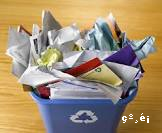

Displayed image 1


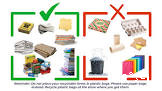

Displayed image 2


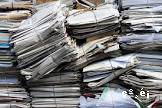

Displayed image 3


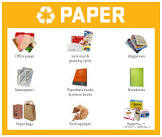

Displayed image 4


In [25]:
import requests
from bs4 import BeautifulSoup
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import os
from IPython.display import display

def fetch_image_urls(query, max_links_to_fetch, headers):
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    response = requests.get(search_url, headers=headers)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    image_elements = soup.find_all('img', limit=max_links_to_fetch)
    image_urls = []
    for img in image_elements:
        url = img.get('src') or img.get('data-src')
        if url and url.startswith('http'):
            image_urls.append(url)
    return image_urls

def label_image(img, label):
    draw = ImageDraw.Draw(img)

    # 使用默認字體
    font = ImageFont.load_default()

    # 使用 textbbox 計算文本尺寸
    text_bbox = draw.textbbox((0, 0), label, font=font)
    position = (img.width - text_bbox[2] - 10, img.height - text_bbox[3] - 10)
    draw.text(position, label, (255, 255, 255), font=font)

def display_images_with_labels(image_urls, label):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    for i, url in enumerate(image_urls):
        try:
            response = requests.get(url, headers=headers)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            label_image(img, label.encode('utf-8'))  # 將標籤字符串編碼為UTF-8
            display(img)
            print(f"Displayed image {i + 1}")
        except Exception as e:
            print(f"Failed to process image {i + 1}: {e}")

def main():
    query = "paper recycling"
    max_images = 5
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    print("Fetching image URLs...")
    image_urls = fetch_image_urls(query, max_images, headers)
    print(f"Found {len(image_urls)} images. Displaying images with labels...")

    display_images_with_labels(image_urls, "纸類")

if __name__ == "__main__":
    main()


爬蟲尋找100張紙類圖片。利用繁體中文爬蟲。

<font color="red">需要用Jupyter notebook執行</font>

In [26]:
import requests
from bs4 import BeautifulSoup
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import os
from IPython.display import display

def fetch_image_urls(query, max_links_to_fetch, headers):
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    response = requests.get(search_url, headers=headers)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    image_elements = soup.find_all('img', limit=max_links_to_fetch)
    image_urls = []
    for img in image_elements:
        url = img.get('src') or img.get('data-src')
        if url and url.startswith('http'):
            image_urls.append(url)
    return image_urls

def label_image(img, label):
    draw = ImageDraw.Draw(img)

    # 使用默認字體
    font = ImageFont.load_default()

    # 使用 textbbox 計算文本尺寸
    text_bbox = draw.textbbox((0, 0), label, font=font)
    position = (img.width - text_bbox[2] - 10, img.height - text_bbox[3] - 10)
    draw.text(position, label, (255, 255, 255), font=font)

def display_images_with_labels(image_urls, label):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    for i, url in enumerate(image_urls):
        try:
            response = requests.get(url, headers=headers)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            label_image(img, label)
            display(img)
            print(f"Displayed image {i + 1}")
        except Exception as e:
            print(f"Failed to process image {i + 1}: {e}")

def main():
    query = "紙類"
    max_images = 100
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    print("Fetching image URLs...")
    image_urls = fetch_image_urls(query, max_images, headers)
    print(f"Found {len(image_urls)} images. Displaying images with labels...")

    display_images_with_labels(image_urls, "紙類")

if __name__ == "__main__":
    main()


Fetching image URLs...
Found 20 images. Displaying images with labels...
Failed to process image 1: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 2: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 3: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 4: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 5: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 6: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 7: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 8: 'latin-1' codec can't encode characters in position 0-1: ordinal not in range(256)
Failed to process image 9: 'latin-1' codec can'

爬蟲尋找紙類圖片。利用英文爬蟲。

Fetching image URLs...
Found 4 images. Displaying images with labels...


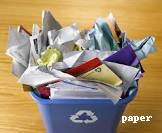

Displayed image 1


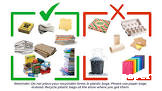

Displayed image 2


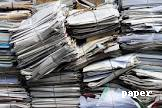

Displayed image 3


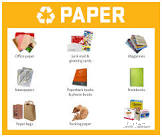

Displayed image 4


In [27]:
import requests
from bs4 import BeautifulSoup
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import os
from IPython.display import display

def fetch_image_urls(query, max_links_to_fetch, headers):
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    response = requests.get(search_url, headers=headers)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    image_elements = soup.find_all('img', limit=max_links_to_fetch)
    image_urls = []
    for img in image_elements:
        url = img.get('src') or img.get('data-src')
        if url and url.startswith('http'):
            image_urls.append(url)
    return image_urls

def label_image(img, label):
    draw = ImageDraw.Draw(img)

    # 使用默认字体
    font = ImageFont.load_default()

    # 使用 textbbox 计算文本尺寸
    text_bbox = draw.textbbox((0, 0), label, font=font)
    position = (img.width - text_bbox[2] - 10, img.height - text_bbox[3] - 10)
    draw.text(position, label, (255, 255, 255), font=font)

def display_images_with_labels(image_urls, label):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    for i, url in enumerate(image_urls):
        try:
            response = requests.get(url, headers=headers)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            label_image(img, label)
            display(img)
            print(f"Displayed image {i + 1}")
        except Exception as e:
            print(f"Failed to process image {i + 1}: {e}")

def main():
    query = "paper recycling"
    max_images = 5
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    print("Fetching image URLs...")
    image_urls = fetch_image_urls(query, max_images, headers)
    print(f"Found {len(image_urls)} images. Displaying images with labels...")

    display_images_with_labels(image_urls, "paper")

if __name__ == "__main__":
    main()


### 範例

In [5]:
import requests
from bs4 import BeautifulSoup

# 這裡以ABC人力銀行中以「數據工程師」為關鍵字後出現的網頁為例
# url="https://www.google.com/?hl=zh-TW"
url="https://recycle.ntpc.gov.tw/Article/Content/25"

#取出網頁原始碼
resp=requests.get(url)

#將網頁資料透過不同的方法，擷取所需的資料，html parser代表以 html 的方式來解析
soup = BeautifulSoup(resp.text,"html.parser")